# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Load the Data

In [136]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [137]:
df = pd.read_csv('/content/drive/MyDrive/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [138]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


In [139]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51912.000000,52000.000000
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,4.130712,349.542558,4.080519,997.078077,39.148558,2.672673,384.503058,1.359397,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,1.926217,259.504721,1.428056,1806.405065,14.212826,3.205080,1304.989395,0.479868,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,15.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,4.000000,323.000000,4.000000,128.500000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,716.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.203900e+06,1.753632,60.714774,98.000000,3.000000,34.000000,51.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [140]:
#Check the shape of the data to understand its structure
df.shape

(52000, 26)

In [141]:
#View the the data with various functions to get an initial sense of the data.
df.head()


,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [142]:
df.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
32099,313130.0,87340.0,-3.230932,50.679147,50,3.0,1,1.0,24/06/2006,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,No,2006
35544,530840.0,167170.0,-0.120978,51.388441,1,2.0,1,2.0,10/10/2012,4,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,Yes,2012
32069,411330.0,287600.0,-1.834589,52.486173,20,3.0,2,1.0,31/07/2009,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Unknown,Dry,1.0,Yes,2009
25010,651500.0,304330.0,1.710719,52.578533,36,2.0,1,1.0,13/09/2013,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
43686,577520.0,188980.0,0.560235,51.571684,42,3.0,1,1.0,13/02/2006,2,...,6,0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,Yes,2006


In [143]:
df.tail()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51999,454710.0,185430.0,-1.212104,51.565050,43,3.0,3,1.0,24/05/2010,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2010


In [144]:
df.tail()

print(df.nunique())

Location_Easting_OSGR                          30693
Location_Northing_OSGR                         32580
Longitude                                      50901
Latitude                                       50701
Police_Force                                      51
Accident_Severity                                  3
Number_of_Vehicles                                13
Number_of_Casualties                              19
Date                                            3286
Day_of_Week                                        7
Local_Authority_(District)                       416
Local_Authority_(Highway)                        206
1st_Road_Class                                     6
1st_Road_Number                                 3584
Road_Type                                          6
Speed_limit                                        7
2nd_Road_Class                                     7
2nd_Road_Number                                 2837
Pedestrian_Crossing-Human_Control             

In [145]:
summary_stats = df.describe()


print(summary_stats)


       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           52000.000000            5.200000e+04  52000.000000   
mean           440284.256846            2.998617e+05     -1.427193   
std             95109.751221            1.613624e+05      1.398249   
min             98480.000000            1.903000e+04     -6.895268   
25%            375540.000000            1.780100e+05     -2.366190   
50%            440950.000000            2.671800e+05     -1.391202   
75%            523500.000000            3.981492e+05     -0.214666   
max            654960.000000            1.203900e+06      1.753632   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  52000.000000  52000.000000       51678.000000        52000.000000   
mean      52.586684     30.401712           2.837145            1.834327   
std        1.453049     25.545581           0.402582            0.727856   
min       50.026153      1.000000           1.000000            1

In [146]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


In [147]:
df.duplicated().sum()

43

In [148]:
df.drop_duplicates(inplace=True)

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [149]:
#Remove the outliers
numeric_df = df.select_dtypes(include='number')

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers_numeric = numeric_df[~((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)]
df_no_outliers = df.copy()
df_no_outliers[df_no_outliers_numeric.columns] = df_no_outliers_numeric

In [150]:
print('Dataframe shape after removing outliers :',df_no_outliers.shape)

Dataframe shape after removing outliers : (51957, 26)


In [151]:
#Impute missing data

print(df.isnull().sum())

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

In [155]:
df['Accident_Severity'].fillna(df['Accident_Severity'].mean(), inplace=True)
df['Number_of_Casualties'].fillna(df['Number_of_Casualties'].mean(), inplace=True)
df['Urban_or_Rural_Area'].fillna(df['Urban_or_Rural_Area'].mean(), inplace=True)


In [154]:
# Convert 'Light_Conditions' to int
df['Light_Conditions'] = pd.to_numeric(df['Light_Conditions'], errors='coerce')
df['Light_Conditions'].fillna(df['Light_Conditions'].mean(), inplace=True)

In [156]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [157]:
from sklearn.impute import SimpleImputer

#Scale the data
numerical_cols = df.select_dtypes(include=['number']).columns
df_numerical = df[numerical_cols]
imputer = SimpleImputer(strategy='mean')
df_numerical_imputed = imputer.fit_transform(df_numerical)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical_imputed)

#Reduce dimentions using PCA
pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Scale the data:",df_scaled)

Explained Variance Ratio: [0.20146541 0.1304621  0.09518022 0.07825316 0.06812873 0.06121158
 0.05891647 0.05872076 0.05809767 0.04834116 0.04597844 0.03956895
 0.03786813]
Scale the data: [[ 1.26394055 -1.2136924   1.21868359 ... -0.29444351  1.33574008
  -0.13288462]
 [ 0.72074131 -0.6979403   0.71249    ... -0.29444351 -0.74979323
   0.19964374]
 [-1.32295781 -0.80974237 -1.29040042 ...  2.81601906 -0.74979323
  -1.46299805]
 ...
 [ 1.05347319 -0.91435539  1.028994   ... -0.29444351 -0.74979323
   0.53217209]
 [-0.0586818   0.21203183 -0.04171037 ... -0.23231097 -0.74979323
   0.53217209]
 [ 0.15147018 -0.70872387  0.15362416 ... -0.29444351  1.33574008
   0.19964374]]


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Light_Conditions']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [158]:

#mplement One-Hot Encoding for nominal categorical variables.
df_encoded = pd.get_dummies(df, columns=['Police_Force', 'Accident_Severity', 'Day_of_Week'])

print(df_encoded.head())

   Location_Easting_OSGR  Location_Northing_OSGR  Longitude   Latitude  \
0               560530.0                103950.0   0.277298  50.812789   
1               508860.0                187170.0  -0.430574  51.572846   
2               314460.0                169130.0  -3.231459  51.414661   
3               341700.0                408330.0  -2.881800  53.568318   
4               386488.0                350090.0  -2.203020  53.047882   

   Number_of_Vehicles  Number_of_Casualties        Date  \
0                   1                   1.0  27/11/2009   
1                   2                   1.0  10/10/2010   
2                   2                   1.0  14/09/2005   
3                   1                   2.0  18/08/2007   
4                   2                   2.0  06/08/2013   

   Local_Authority_(District) Local_Authority_(Highway)  1st_Road_Class  ...  \
0                         556                 E10000011               3  ...   
1                          26           

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [159]:
df.columns


Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [160]:
features = ['Weather_Conditions', 'Local_Authority_(Highway)', 'Number_of_Casualties', 'Road_Type', 'Date', 'Day_of_Week']

df_selected = df[features]

print(df_selected.head())

           Weather_Conditions Local_Authority_(Highway)  Number_of_Casualties  \
0     Raining with high winds                 E10000011                   1.0   
1     Fine without high winds                 E09000017                   1.0   
2     Fine without high winds                 W06000014                   1.0   
3  Raining without high winds                 E10000017                   2.0   
4     Fine without high winds                 E06000021                   2.0   

            Road_Type        Date  Day_of_Week  
0    Dual carriageway  27/11/2009            6  
1  Single carriageway  10/10/2010            1  
2  Single carriageway  14/09/2005            4  
3      One way street  18/08/2007            7  
4  Single carriageway  06/08/2013            3  


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

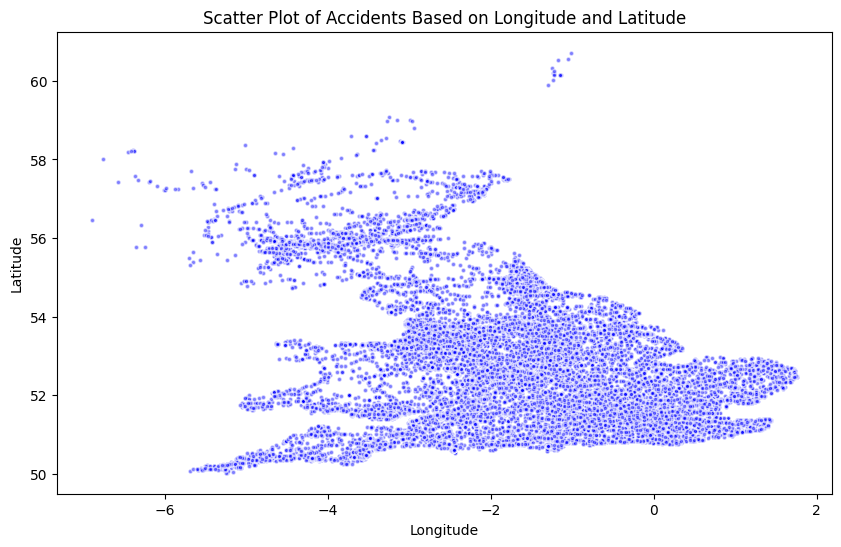

In [161]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, c='blue', edgecolors='w', s=10)
plt.title('Scatter Plot of Accidents Based on Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


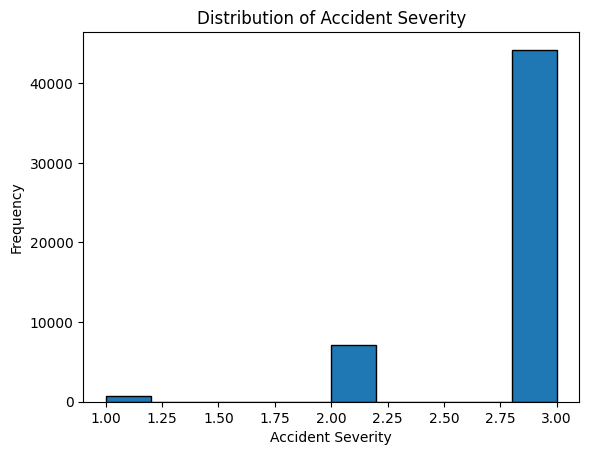

In [162]:
plt.hist(df['Accident_Severity'], bins=10, edgecolor='black')
plt.xlabel('Accident Severity')
plt.ylabel('Frequency')
plt.title('Distribution of Accident Severity')
plt.show()

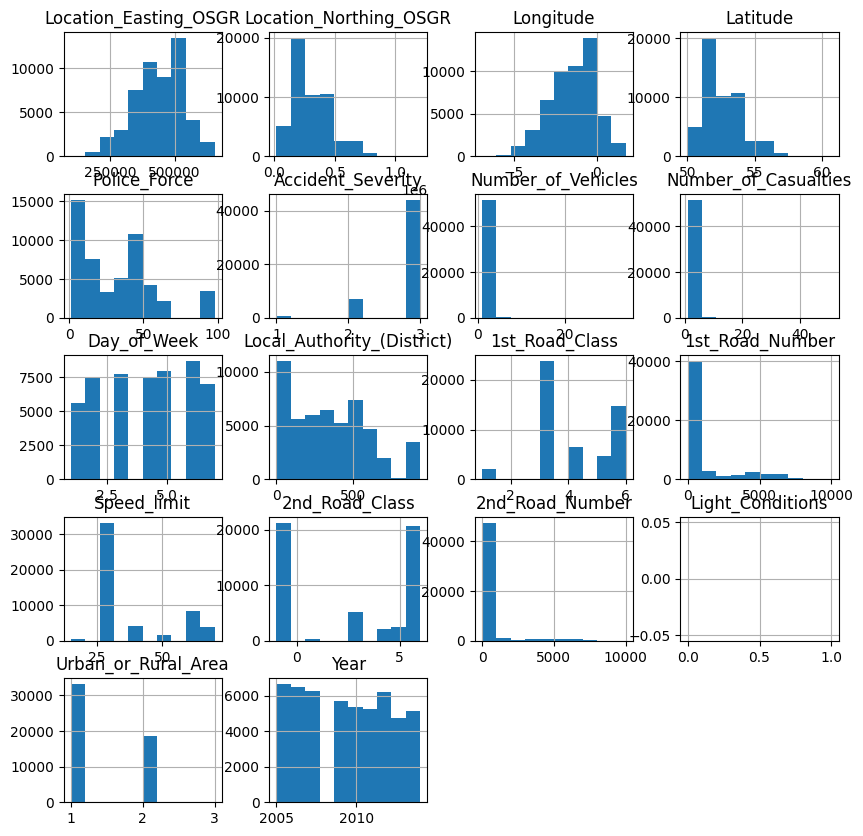

In [163]:
histograms = df.hist(figsize=(10, 10))

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [164]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

k =3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_pca)
labels = kmeans.labels_
kmeans_silhouette = silhouette_score(df_pca, labels)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Evaluation
Evaluate the clustering result using appropriate metrics.


K-means Silhouette Score: 0.16413367441194227


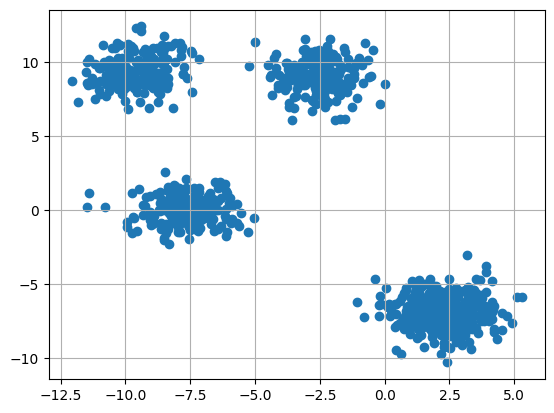

In [165]:
print("K-means Silhouette Score:", kmeans_silhouette)
X, y = make_blobs(n_samples=1000, n_features=10, centers=5, random_state=42)
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
plt.show()


## Plot the data points with their predicted cluster center

In [169]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df_pca, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.16413367441194227


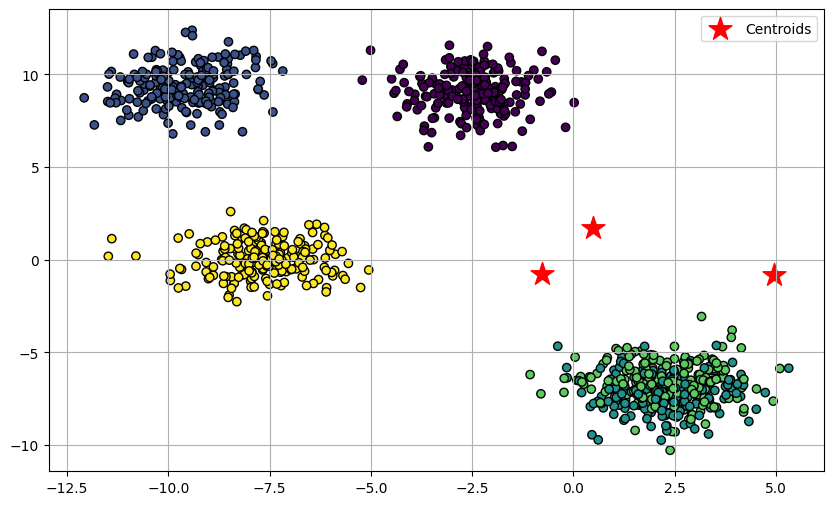

In [176]:

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.legend()
plt.grid(True)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?